## MTurk I/O for Image Dataset

The query of interest is: **The outlined boxes depict a person drinking water** 

Want to generate the input .csv file for MTurk and parse the output csv file for results. Using MTurkHelper from babble with adjustments for candidate type.

In [1]:
import numpy as np
%matplotlib inline

import os
import sys
import pandas as pd


%load_ext autoreload
%autoreload 2

## MTurk Helper for Input CSV

In [2]:
sys.path.append('../data/')
from tutorials.babble import MTurkHelper
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We want to make "fake" candidates for the visual tesk since it doesn't fit into the actual sense of the word "candidate". They will just be a list of image names that are saved (how convenient!)

In [3]:
filelist= [file for file in os.listdir('/dfs/scratch0/paroma/visual_genome/') if ((file.startswith('drink-val_')) and (file.endswith('.png')))]
print (len(filelist) % 4 == 0)
print len(filelist)/4

False
123


In [3]:
helper = MTurkHelper(candidates=filelist, labels=[], num_hits=1+len(filelist)/4)

NameError: name 'filelist' is not defined

In [4]:
input_csv_path = './data/Labels_for_Drink_v0.1.csv'
helper.preprocess_visual(input_csv_path)

NameError: name 'helper' is not defined

## MTurk Helper for Output Labels CSV

In [5]:
output_csv_path = (os.environ['SNORKELHOME'] + '/tutorials/babble/drink/data/Labels_for_Drink_v0.1_out.csv')

Reading val CSV!
Num HITs unique: 124
Num HITs total: 372


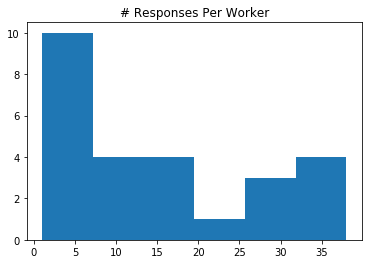

Median # seconds/HIT: 217 (54.0 s/explanation)


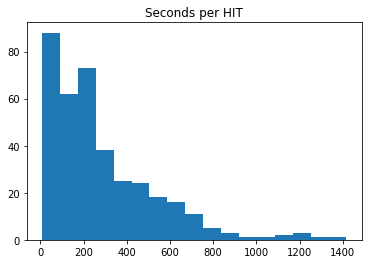

Unanimous: 397
Majority: 67
Bad: 31


In [6]:
helper = MTurkHelper(candidates=[], labels=[], num_hits=None, domain='vg', workers_per_hit=3)
labels_by_candidate = helper.postprocess_visual(output_csv_path, is_gold=True, set_name='val', candidates=[], verbose=True)

In [8]:
print "Number of Valid Dev Set Candidates: ", len(labels_by_candidate)
#np.save(os.environ['SNORKELHOME'] + '/tutorials/babble/bike/data/temp_val_labels_by_candidate.npy', np.array(labels_by_candidate))

Number of Valid Dev Set Candidates:  464


## MTurk Helper for Explanation Generation

In [29]:
filelist= [file for file in os.listdir('/dfs/scratch0/paroma/visual_genome/') if ((file.startswith('drink-train_')) and (file.endswith('.png')))]
filelist.sort()
filelist = filelist[0:160]

print (len(filelist) % 4 == 0)
print len(filelist)/4

True
40


In [30]:
helper = MTurkHelper(candidates=filelist, labels=[], num_hits=len(filelist)/4)

In [32]:
input_csv_path = './data/Drink_VisualGenome.csv'
helper.preprocess_visual(input_csv_path)

Wrote 40 HITs with 4 candidates per HIT


## Generating Train Candidates for Labels

In [39]:
all_train_cand = [file for file in os.listdir('/dfs/scratch0/paroma/visual_genome/') 
                  if ((file.startswith('drink-train_')) and (file.endswith('.png')))]
print 'Num HITs: ', int(round(len(all_train_cand)/4.0))

Num HITs:  631


In [68]:
helper = MTurkHelper(candidates=all_train_cand, labels=[], num_hits=int(round(len(all_train_cand)/4.0)))

In [69]:
# input_csv_path = './data/Drink_Train_Labels_in.csv'
# helper.preprocess_visual(input_csv_path)

In [70]:
output_csv_path = (os.environ['SNORKELHOME'] + '/tutorials/babble/drink/data/Drink_Train_Labels_out.csv')

Reading train CSV!
Num HITs unique: 631
Num HITs total: 1262


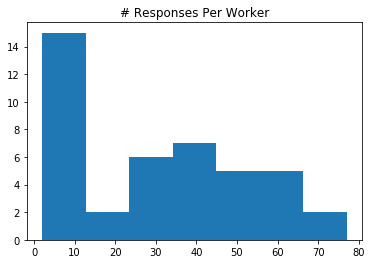

Median # seconds/HIT: 295 (73.0 s/explanation)


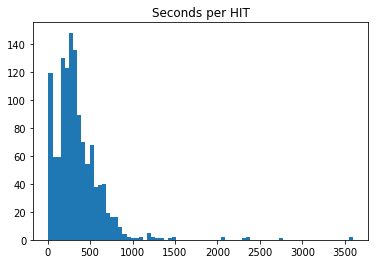

Unanimous: 2264
Majority: 0
Bad: 2700


In [73]:
helper = MTurkHelper(candidates=[], labels=[], num_hits=int(round(len(all_train_cand)/4.0)), domain='vg', workers_per_hit=2)
labels_by_candidate = helper.postprocess_visual(output_csv_path, is_gold=True, set_name='train', verbose=True)

In [74]:
print "Number of Valid Train Set Candidates: ", len(labels_by_candidate)
#np.save('/dfs/scratch0/paroma/coco/annotations/train_labels_by_candidate.npy', np.array(labels_by_candidate))

Number of Valid Train Set Candidates:  2440


## MTurk Helper for Explanations CSV

In [75]:
output_csv_path = (os.environ['SNORKELHOME'] + '/tutorials/babble/drink/data/Drink_VisualGenome_out.csv')

Reading train CSV!
Num HITs unique: 40
Num HITs total: 120


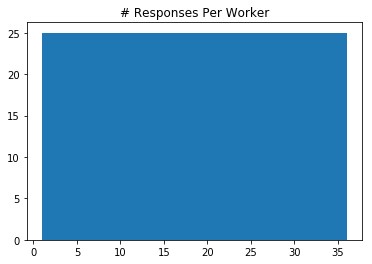

Median # seconds/HIT: 806 (201.0 s/explanation)


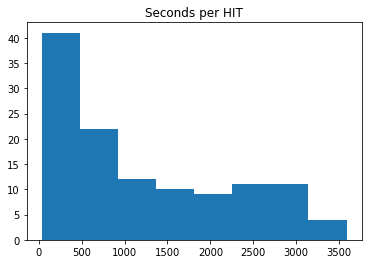

Unanimous: 111
Majority: 36
Bad: 160


In [76]:
helper = MTurkHelper(candidates=[], labels=[], num_hits=40, domain='vg', workers_per_hit=3)
explanations = helper.postprocess_visual(output_csv_path, set_name='train', candidates=[], verbose=True)

## Debugging for BabbleModel

In [77]:
from snorkel.contrib.babble import Babbler
user_lists = {}
babbler = Babbler(mode='image', explanations=explanations)

Created grammar with 426 rules


In [78]:
lfs = babbler.generate_lfs()
babbler.get_explanations()

233 parses created from 153 out of 398 explanation(s)
Parsed 233 LFs from 398 explanations.


[Explanation("Explanation0: False, Box Y is too far from the center of Box X"),
 Explanation("Explanation1: False, Box Y is against right edge of Box X"),
 Explanation("Explanation10: False, Box Y is too far from the top of Box X"),
 Explanation("Explanation100: False, The center of box Y is below the center of box X."),
 Explanation("Explanation103: False, The center of box Y is in the center of box X."),
 Explanation("Explanation11: False, Box Y is far right of center of Box X."),
 Explanation("Explanation11: False, Box Y is far right of center of Box X."),
 Explanation("Explanation11: False, Box Y is far right of center of Box X."),
 Explanation("Explanation113: False, The left of Box Y is inside the right of box X."),
 Explanation("Explanation116: False, The left of Box Y is to the right of box X."),
 Explanation("Explanation117: False, The center of Box Y is to the left of box X."),
 Explanation("Explanation119: False, Box Y is too far outside Box X"),
 Explanation("Explanation119

In [79]:
babbler.filter_duplicate_semantics()

Filtered to 84 LFs with duplicate semantics filter (149 filtered).
